# Libaries

In [1]:
import requests
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import io
import csv
import random

In [2]:
#data_path = '/home/gonzalez/Desktop/age_gender/age_gender.csv' # old data
# url = 'https://www.kaggle.com/code/shahraizanwar/age-gender-ethnicity-prediction/data?select=age_gender.csv'

Baseline

In [3]:
data_path = '/home/gonzalez/code/jagonzalezj/age_gender/raw_data/new_data.csv' 
data = pd.read_csv(data_path, encoding='utf-8')

#data['test_age']=0==data['age']
#data.head()

In [ ]:
#data.test_age.mean()

In [ ]:
#def compute_gender_baseline(df):
    df['test_gender']=(data['gender']==0)
    return df['test_gender'].mean()

In [ ]:
#compute_gender_baseline(data)

In [25]:
data_path = '/home/gonzalez/Desktop/age_gender/age_gender.csv' # old data
data = pd.read_csv(data_path)
data['pixels']=data['pixels'].apply(lambda x:  np.array(x.split(), dtype="float32"))

In [34]:
for j in range(len(data)):
    data['pixels'][j]=data['pixels'][j]/255

/tmp/ipykernel_4946/3047410609.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['pixels'][j]=data['pixels'][j]/255


In [35]:
data

,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,"[0.5058824, 0.5019608, 0.5019608, 0.49411765, ..."
1,1,2,0,20161219222752047.jpg.chip.jpg,"[0.6431373, 0.2901961, 0.43529412, 0.65882355,..."
2,1,2,0,20161219222832191.jpg.chip.jpg,"[0.2627451, 0.27450982, 0.2784314, 0.27450982,..."
3,1,2,0,20161220144911423.jpg.chip.jpg,"[0.75686276, 0.77254903, 0.7764706, 0.78431374..."
4,1,2,0,20161220144914327.jpg.chip.jpg,"[0.7921569, 0.8039216, 0.81960785, 0.8235294, ..."
...,...,...,...,...,...
23700,99,0,1,20170120221920654.jpg.chip.jpg,"[0.49803922, 0.39215687, 0.36862746, 0.3176470..."
23701,99,1,1,20170120134639935.jpg.chip.jpg,"[0.09019608, 0.10980392, 0.1254902, 0.13725491..."
23702,99,2,1,20170110182418864.jpg.chip.jpg,"[0.23137255, 0.19607843, 0.14509805, 0.1568627..."
23703,99,2,1,20170117195405372.jpg.chip.jpg,"[0.1764706, 0.42352942, 0.47058824, 0.6117647,..."


# processing color data from Pierre

In [ ]:
 # new data from Pierre
data_path = '/home/gonzalez/code/jagonzalezj/age_gender/raw_data/new_data.csv' 
data = pd.read_csv(data_path, encoding='utf-8')

lola =[]   
for i in range(len(data['image'])):
    a = data['image'][i].replace('[',',').replace(']',',').replace(',','').split()
    lola.append([int(j) for j in a])
    
data['image']=lola
data.columns=['age', 'gender', 'ethnicity', 'pixels']

data['ethnicity'].unique()[5:]
for items in data['ethnicity'].unique()[5:]:
    data = data.drop(data[data.ethnicity==items].index).copy()

data = data.dropna()
data.reindex()

# Loading data from google cloud to google colab

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')
df=pd.read_csv('gdrive/My Drive/age_gender.csv')

# Transforming the pixels data type into a list of float

In [ ]:
# images =[]
# for fotos in range(len(data['pixels'])):
#     X = data['pixels'][fotos].split(" ")
#     X = list(map(int, X))
#     images.append(X)

In [ ]:
# x = np.reshape(images[5000], (48,48))

In [ ]:
data['pixels']=data['pixels'].apply(lambda x:  np.array(x.split(), dtype="float32"))

In [ ]:
blob = data['pixels'][0].reshape(48,48)

In [ ]:
plt.imshow(blob, cmap='gray');

In [ ]:
#sns.displot(data['ethnicity']),
#sns.displot(data['gender']), 
#sns.displot(data['age']);
fig, axes = plt.subplots(1, 3, figsize=(12, 5))
sns.histplot(ax=axes[0], x=data['age']);
sns.histplot(ax=axes[1], x=data['ethnicity']);
sns.histplot(ax=axes[2], x=data['gender']);

# Working with the age

In [ ]:
# list the number of counts per age
ages = data['age'].unique()
counts = []
for age in ages:
    counts.append(np.count_nonzero(data['age']==age))

In [ ]:
# table with the first 15 most dense samples regarding age
type(ages), type(counts)
s =pd.DataFrame([ages.T, np.array(counts).T],['ages', 'counts'])
s=s.transpose()
more_dense = s.sort_values(by=['counts'], ascending=False)
more_dense.head(15)

In [ ]:
data = data.drop(data[data.age==29].index).copy()
data.reset_index(drop=True)

In [ ]:
sns.histplot(data.age);

The filter of Pierre

In [ ]:
data_clean = data.copy()
data['points_bin'] = pd.qcut(data_clean['age'], q=10)

#view updated DataFrame
print(data)
data['points_bin'].value_counts()

In [ ]:
data

# External image manipulation funtions

In [ ]:
import cv2
import sys, os

In [ ]:
# get image
#locattion = "/home/gonzalez/foto.jpg" # javier
#locattion = "/home/gonzalez/Paul.jpeg" # Paul
#locattion = "/home/gonzalez/Konstantine.jpeg"
locattion = "/home/gonzalez/ping.jpg" # Paul



In [ ]:
#base_dir = os.path.dirname(locattion)
#image = cv2.imread("/home/gonzalez/foto.jpg")
#plt.imshow(image, cmap='gray');
#print(f'==> image resolution {image.shape}')

# from PIL import Image           # this can be used to rotate images
# image = Image.open(locattion)

# (h, w) = image.shape[:2]
# blob = cv2.dnn.blobFromImage(cv2.resize(image, (300, 300)), 1.0, (300, 300), (104.0, 177.0, 123.0))
# #blob.shape
# blob.shape

In [ ]:
imagePath=locattion
image = cv2.imread(imagePath)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
faces = faceCascade.detectMultiScale(
    gray,
    scaleFactor=1.3,
    minNeighbors=3,
    minSize=(30, 30)
)

print("[INFO] Found {0} Faces.".format(len(faces)))

for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0),1)
    roi_color = image[y:y + h, x:x + w]
    #print("[INFO] Object found. Saving locally.")
    #cv2.imwrite(str(w) + str(h) + '_faces.jpg', roi_color)

In [ ]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(16,16))

ax1.imshow(image) # original image

ax2.imshow(roi_color) # recorted original image
roi_color.shape

img = np.mean(roi_color, axis=2) # black and white image
ax3.imshow(img, cmap='gray');

img=img[2:,2:]  # remove red line effect

res_final = cv2.resize(img, dsize=(48, 48), interpolation=cv2.INTER_LINEAR)
ax4.imshow(res_final, cmap='gray');


In [ ]:
res_final.shape
res_final_ready = np.reshape(res_final, (-1, 48, 48,1))
res_final_ready.shape

In [ ]:
# model.predict(res_final_ready)
# index = np.where(model.predict(res_final_ready)==(model.predict(res_final_ready).max()))
# index[1][0]

In [ ]:
#model = models.load_model('Model48_datafiltered/')
int(model.predict(res_final_ready)[0][0])

#model.predict(res_final_ready)
#index = np.where(model.predict(res_final_ready)==(model.predict(res_final_ready).max()))
#print(f'slot number {index[1][0]}, correspond to range {index[1][0]*step_size-step_size} to {index[1][0]*step_size}')

In [ ]:
# resize image

In [ ]:
# image conver to black and white
#image = cv2.imread(imagePath)
#gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Function for transforming data numbers into data range classification

In [ ]:
# categorize age per range:
def age_categorize(input_list, age_step=10):
    '''
    Enter the list of age into input_list and the age steps
    with : age_step = 5;  age = 4   =>  1-5
                          age = 12  =>  10-15                        
    '''
    
    cat_age = []
    for age in input_list:
        
        a = float(age)/float(age_step)
        
        if a > 1:
            entero = int(a)
            coma = a-entero
            
            if coma > 0:
                entero = entero+1
            
            max = entero * age_step
            min = max-(age_step-1)     
            #cat_age.append(f'{min} to {max}')   # if the output is in the real intervale
            cat_age.append(int(max/age_step)-1)  # if the output is in categorical int number
        else:
            min = 1
            max = age_step
            #cat_age.append(f'{min} to {max}')    # if the output is in the real intervale   
            cat_age.append(int(max/age_step)-1)   # if the output is in categorical int number
            
    return cat_age


def age_categorize_custom(input_list, custom = [0, 15, 35, 60, 150]):
    category = list(range(0,len(custom)))
    data['age'].unique()
    cat_age = []

    for edad in data['age']:
        category = list(range(0,len(custom)))
        for cate in category:
            if edad<custom[cate]:
                #print(edad, cate, custom[cate-1], custom[cate])
                cat_age.append(cate)
                break
    return cat_age

# Here we go with the model

In [ ]:
from tensorflow.keras import Sequential, layers, models
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from sklearn.model_selection import train_test_split

In [ ]:
# X = data['pixels'].tolist()
# X = np.reshape(X, (-1, 48, 48,1))


X = data['pixels'].tolist()
X = np.reshape(X, (-1, 48, 48,3))

y=data['age']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# train_datagen=ImageDataGenerator(rescale=1/255)
# train_generator_age=train_datagen.flow(
#     X_train ,y_train ,batch_size=32)

# test_datagen=ImageDataGenerator(rescale=1/255)
# test_generator_age=test_datagen.flow(
#     X_test ,y_test ,batch_size=32)

In [ ]:
def initialize_model(numb_int, numb_out):
    
    model = Sequential()
    model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(48,48,numb_int)))
    model.add(layers.MaxPool2D(pool_size=(2,2)))

    model.add(layers.Conv2D(64, (3,3), activation='relu', padding='same'))
    model.add(layers.MaxPool2D(pool_size=(2,2)))
   
    model.add(layers.Conv2D(64,(3,3),activation='relu'))
    model.add(layers.MaxPooling2D(2,2))
    model.add(layers.Dropout(0.2))

    model.add(layers.Conv2D(128,(3,3),activation='relu'))
    model.add(layers.MaxPooling2D(2,2))
    model.add(layers.Dropout(0.2))          

    model.add(layers.Flatten())
    model.add(layers.Dropout(0.5))
    
    model.add(layers.Dense(1, activation='relu'))
   
    return model

In [ ]:
model = initialize_model(X.shape[-1], y.shape[-1])
model.summary()

In [ ]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='mae', patience=6, restore_best_weights=True)

# earlystop=EarlyStopping(patience=6)
# learning_rate_reduction=ReduceLROnPlateau(
#     monitor='val_acc',
#     patience= 3,
#     verbose=1,
# )
# callbacks = [earlystop, learning_rate_reduction]

In [ ]:
X_train.shape

In [ ]:
# history_age = model.fit(
#     train_generator_age, 
#     epochs= 60,
#     validation_data= test_generator_age,
#     callbacks= callbacks)

In [ ]:
#history = model.fit(X_train, y_train, epochs=40, callbacks=[es])

In [ ]:
history = model.fit(X, y, validation_split=0.3, epochs=40, callbacks=[es], batch_size=32)

In [ ]:
#history.__dict__

In [ ]:
plt.plot(history.history['loss']);
plt.plot(history.history['mae']);

In [ ]:
models.save_model(model, 'Model48_linearColor')
#model = models.load_model('Model48')

In [ ]:
model.evaluate(X_test,y_test)

In [ ]:
n=142
plt.imshow(X[n] );
data.iloc[n]

In [ ]:
#out= model.predict(X_test)
try_inp = np.expand_dims(X[n], axis=0)
model.predict(try_inp)[0,0]

In [ ]:
np.shape(X[0])

# MODEL USING DATA BUCKET

In [ ]:
from tensorflow.keras import Sequential, layers, models
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from sklearn.model_selection import train_test_split

In [ ]:
step_size = 5
input_list = data['age']
cat = age_categorize(input_list, step_size)
#pd.DataFrame(cat, data['age'].values).sample(100)

In [ ]:
# add categorical age clasification to original dataframe
data['class_age']=cat
#data[['age','class_age']].sample(10)

In [ ]:
sns.histplot(data['class_age']);

In [ ]:
### perform one-hot encoder
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse = False)
ohe.fit(data[['class_age']])
class_age_encoded = ohe.transform(data[['class_age']])

In [ ]:
data

 Using Pierre distribution

In [ ]:
# Pierre distribution
data_clean = data.copy()
data['points_bin'] = pd.qcut(data_clean['age'], q=10)

#view updated DataFrame
print(data)
data['points_bin'].value_counts()

In [ ]:
# perform one-hot encoder to the Pierre distribution
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse = False)
ohe.fit(data[['points_bin']])
class_age_encoded = ohe.transform(data[['points_bin']])

In [ ]:
for elements in range(class_age_encoded.shape[1]):      # =====> THIS IS NEED WHATHERVER HOT ENCODER USED  <=====
    data[str(elements)]=class_age_encoded[:,elements]

In [ ]:
y=data.drop(columns=['age','ethnicity','gender', 'pixels', 'points_bin'])

Finished Pierre encoding

In [ ]:
#y=data.drop(columns=['age','ethnicity','gender', 'pixels', 'class_age'])
#y=data.drop(columns=['age','ethnicity','gender', 'img_name', 'pixels', 'points_bin'])

In [ ]:
X = data['pixels'].tolist()
X = np.reshape(X, (-1, 48, 48,3))

y = class_age_encoded

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
def initialize_model_catgorical(numb_int, numb_out):
        
    model = Sequential()
    model.add(layers.Conv2D(32,(3,3), padding='same',activation='relu',input_shape=(48,48,numb_int)))
    model.add(layers.MaxPooling2D(2,2))

    model.add(layers.Conv2D(32,(3,3), padding='same',activation='relu'))
    model.add(layers.MaxPooling2D(2,2))

    model.add(layers.Conv2D(64,(3,3), padding='same',activation='relu'))
    model.add(layers.MaxPooling2D(2,2))

    model.add(layers.Flatten())
    model.add(layers.Dense(128,activation='relu'))
   
    #model.add(layers.Flatten())
    #model.add(layers.Dense(128,activation='relu'))

    model.add(layers.Dense(numb_out, activation='softmax'))   
    return model

In [ ]:
#model = initialize_model_catgorical()
model = initialize_model_catgorical(X.shape[-1], y.shape[-1])

model.summary()

In [ ]:
model.compile(optimizer='adam' ,loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
es = EarlyStopping(monitor='accuracy', patience=6, restore_best_weights=True)

In [ ]:
history_cat = model.fit(X_train,y_train, validation_split=0.3, epochs=50, callbacks=[es])

In [ ]:
#history_cat = model.fit(X, y, validation_split=0.3, epochs=40, callbacks=[es], batch_size=32)  # the best

In [ ]:
models.save_model(model, 'Model48_categorical_ColorData')

In [ ]:
plt.plot(history_cat.history['val_accuracy']);
plt.plot(history_cat.history['accuracy']);

In [ ]:
model.evaluate(X_test,y_test)

In [ ]:
n=244
plt.imshow(X[n], cmap='gray');
#np.where(y.iloc[n]==1)[0]
print(f"real age is {data.iloc[n]}")

In [ ]:
try_inp = np.expand_dims(X[n], axis=0)
model.predict(try_inp).max()
index = np.where(model.predict(try_inp)==(model.predict(try_inp).max()))
index[1][0]

In [ ]:
model.predict(try_inp)

In [ ]:
try_inp = np.expand_dims(X[n], axis=0)
model.predict(try_inp).max()
index = np.where(model.predict(try_inp)==(model.predict(try_inp).max()))
print(f'slot number {index[1][0]}, correspond to range {index[1][0]*step_size-step_size} to {index[1][0]*step_size}')

# best results using colab with regression on virgen data

In [ ]:
import requests
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import io
import csv

from google.colab import drive 
drive.mount('/content/gdrive')
data=pd.read_csv('gdrive/My Drive/age_gender.csv')

data['pixels']=data['pixels'].apply(lambda x:  np.array(x.split(), dtype="float32"))

from tensorflow.keras import Sequential, layers, models
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from sklearn.model_selection import train_test_split

X = data['pixels'].tolist()
X = np.reshape(X, (-1, 48, 48,1))

y = data['age']


def initialize_model():
    
    model = Sequential()
    model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(48,48,1)))
    model.add(layers.MaxPool2D(pool_size=(2,2)))

    model.add(layers.Conv2D(64, (3,3), activation='relu', padding='same'))
    model.add(layers.MaxPool2D(pool_size=(2,2)))
   
    model.add(layers.Conv2D(64,(3,3),activation='relu'))
    model.add(layers.MaxPooling2D(2,2))
    model.add(layers.Dropout(0.2))

    model.add(layers.Conv2D(128,(3,3),activation='relu'))
    model.add(layers.MaxPooling2D(2,2))
    model.add(layers.Dropout(0.2))          

    model.add(layers.Flatten())
    model.add(layers.Dropout(0.5))
    
    model.add(layers.Dense(1, activation='relu'))
   
    return model

model = initialize_model()
model.summary()

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])

from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

history = model.fit(X_train, y_train, epochs=100, callbacks=[es])

plt.plot(history.history['loss']);
plt.plot(history.history['mae']);

n=5
out = np.reshape(X_test[n], (48, 48))
plt.imshow(out, cmap='gray');
y_test.iloc[n]

try_inp = np.expand_dims(X_test[n], axis=0)
model.predict(try_inp)[0,0]

# Combination of categorical plus linear for BW images

In [1]:
import requests
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import io
import csv
from tensorflow.keras import Sequential, layers, models
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from sklearn.model_selection import train_test_split

2022-06-05 16:07:48.565116: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/gonzalez/TOOLS/elmer/install//lib
2022-06-05 16:07:48.565138: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


## models

In [ ]:
def initialize_model_regression():
    
    model = Sequential()
    model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(48,48,1)))
    model.add(layers.MaxPool2D(pool_size=(2,2)))

    model.add(layers.Conv2D(64, (3,3), activation='relu', padding='same'))
    model.add(layers.MaxPool2D(pool_size=(2,2)))
   
    model.add(layers.Conv2D(64,(3,3),activation='relu'))
    model.add(layers.MaxPooling2D(2,2))
    model.add(layers.Dropout(0.2))

    model.add(layers.Conv2D(128,(3,3),activation='relu'))
    model.add(layers.MaxPooling2D(2,2))
    model.add(layers.Dropout(0.2))          

    model.add(layers.Flatten())
    model.add(layers.Dropout(0.5))
    
    model.add(layers.Dense(1, activation='relu'))
   
    return model

In [ ]:
def initialize_model_catgorical(numb_int, numb_out):
        
    model = Sequential()
    model.add(layers.Conv2D(32,(3,3), padding='same',activation='relu',input_shape=(48,48,numb_int)))
    model.add(layers.MaxPooling2D(2,2))

    model.add(layers.Conv2D(32,(3,3), padding='same',activation='relu'))
    model.add(layers.MaxPooling2D(2,2))

    model.add(layers.Conv2D(64,(3,3), padding='same',activation='relu'))
    model.add(layers.MaxPooling2D(2,2))
    model.add(layers.Dropout(0.2))

    model.add(layers.Conv2D(64,(3,3), padding='same',activation='relu'))
    model.add(layers.MaxPooling2D(2,2))
    model.add(layers.Dropout(0.2))


#     model = Sequential()
#     model.add(layers.Conv2D(32,(3,3), padding='same',activation='relu',input_shape=(48,48,numb_int)))
#     model.add(layers.MaxPooling2D(2,2))

#     model.add(layers.Conv2D(32,(3,3), padding='same',activation='relu'))
#     model.add(layers.MaxPooling2D(2,2))
    

    model.add(layers.Conv2D(320,(3,3), padding='same',activation='relu'))
    #model.add(layers.MaxPooling2D(2,2))
    #model.add(layers.Dropout(0.2))
    
    model.add(layers.Conv2D(320,(3,3), padding='same',activation='relu'))
    #model.add(layers.MaxPooling2D(2,2))
    #model.add(layers.Dropout(0.2))

    model.add(layers.Conv2D(520,(3,3), padding='same',activation='relu'))
    #model.add(layers.MaxPooling2D(2,2))
    #model.add(layers.Dropout(0.2))

#     model.add(layers.Conv2D(160,(3,3), padding='same',activation='relu'))
#     model.add(layers.MaxPooling2D(2,2))
#     model.add(layers.Dropout(0.2))



    model.add(layers.Flatten())
    model.add(layers.Dense(128,activation='relu'))
   
#     model.add(layers.Flatten())
#     model.add(layers.Dense(128,activation='relu'))

    model.add(layers.Dense(numb_out, activation='softmax'))   
    return model

## load the data

In [24]:
data_path = '/home/gonzalez/Desktop/age_gender/age_gender.csv' # old data
data = pd.read_csv(data_path)
data['pixels']=data['pixels'].apply(lambda x:  np.array(x.split(), dtype="float32"))

## FILTERING THE DATA

In [4]:
# list the number of counts per age
ages = data['age'].unique()
counts = []
for age in ages:
    counts.append(np.count_nonzero(data['age']==age))

In [5]:
# table with the first 15 most dense samples regarding age
type(ages), type(counts)
s =pd.DataFrame([ages.T, np.array(counts).T],['ages', 'counts'])
s=s.transpose()
more_dense = s.sort_values(by=['counts'], ascending=False)
more_dense.head(15)

,ages,counts
26,26,2197
0,1,1123
28,28,918
36,35,880
24,24,859
25,25,734
31,30,724
33,32,664
27,27,615
29,29,570


In [6]:
#data = data.drop(data[data.age==26].index).copy()
data = data.drop(data[data.age<2].index).copy()
data = data.drop(data[data.age>80].index).copy()

data.reset_index(drop=True)

,age,ethnicity,gender,img_name,pixels
0,10,0,0,20170110225414790.jpg.chip.jpg,"[30.0, 38.0, 50.0, 90.0, 109.0, 113.0, 126.0, ..."
1,10,0,0,20170110225417177.jpg.chip.jpg,"[72.0, 81.0, 94.0, 96.0, 77.0, 85.0, 90.0, 71...."
2,10,0,0,20170110224549512.jpg.chip.jpg,"[255.0, 253.0, 252.0, 221.0, 144.0, 174.0, 165..."
3,10,0,0,20170110225402690.jpg.chip.jpg,"[62.0, 53.0, 55.0, 62.0, 73.0, 74.0, 86.0, 94...."
4,10,0,0,20170110225421531.jpg.chip.jpg,"[28.0, 60.0, 55.0, 55.0, 74.0, 74.0, 62.0, 101..."
...,...,...,...,...,...
22037,9,0,0,20170110215653284.jpg.chip.jpg,"[73.0, 66.0, 78.0, 108.0, 112.0, 124.0, 128.0,..."
22038,9,0,0,20170110215848132.jpg.chip.jpg,"[74.0, 89.0, 51.0, 63.0, 69.0, 80.0, 94.0, 95...."
22039,9,0,0,20170110220005370.jpg.chip.jpg,"[98.0, 90.0, 90.0, 111.0, 133.0, 149.0, 169.0,..."
22040,9,0,0,20170110220016235.jpg.chip.jpg,"[57.0, 74.0, 93.0, 92.0, 110.0, 124.0, 130.0, ..."


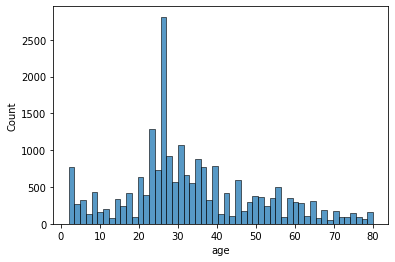

In [7]:
sns.histplot(data.age);

mirroring the images of ages les dense

In [8]:
from PIL import Image, ImageOps
import numpy as np

def pixel_mirroring(pixel):
    '''Mirroring a pixel from the prepared dataset'''

    #Turn the pixel list into an array 48,48
    array=np.uint8(pixel.reshape((48,48)))

    #Turn the array into an image object and mirror it
    img=Image.fromarray(array, 'L')
    img=ImageOps.mirror(img)

    #Turn the image back into a pixel list
    img=img.getdata()
    pixel_mirror=np.array(img, dtype=np.float32)

    return pixel_mirror

def count_amout_per_age(data):
    ages = data['age'].unique()
    counts = []
    for age in ages:
        counts.append(np.count_nonzero(data['age']==age))

    type(ages), type(counts)
    s =pd.DataFrame([ages.T, np.array(counts).T],['ages', 'counts'])
    s=s.transpose()
    more_dense = s.sort_values(by=['counts'], ascending=True)
    more_dense.head(15)
    return more_dense

In [10]:
dense = count_amout_per_age(data)

In [11]:
more = dense[dense.counts>600].copy()['ages'].unique()
less = dense[dense.counts<600].copy()['ages'].unique()

In [12]:
data_less = data.copy()
data_more = data.copy()

for age in more:
    data_less = data_less.drop(data_less[data_less.age==age].index).copy()

for age in less:
    data_more = data_more.drop(data_more[data_more.age==age].index).copy()

In [13]:
mirrored = []
for images in data_less['pixels']:
    mirrored.append(pixel_mirroring(images))

In [14]:
data_less_mirrored = data_less.copy()
data_less_mirrored['mirrored']=mirrored

In [15]:
data_less_mirrored.drop(columns=['pixels'], inplace=True)
data_less_mirrored.rename(columns={'mirrored':'pixels'}, inplace=True)

In [16]:
# merge two data frames, reste indexes
presque = pd.concat([data_less, data_less_mirrored, data_more]).reset_index(drop=True, inplace=False) 

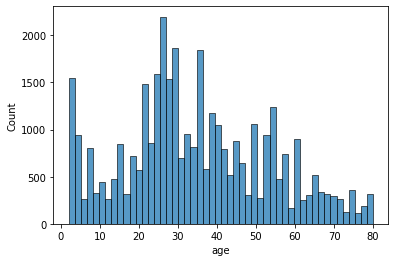

In [17]:
sns.histplot(presque['age']);

In [18]:
data = presque.copy()


Steping and encoding

In [20]:
#step_size = 15
#input_list = data['age']
#cat = age_categorize(input_list, step_size)  # ====>>  INITIALIZE THIS FUNCTION  <<=========

input_list = data['age']
custom = [0, 15, 35, 60, 150]
cat = age_categorize_custom(input_list, custom)  # ====>>  INITIALIZE THIS FUNCTION  <<=========


#pd.DataFrame(cat, data['age'].values).sample(100)

In [21]:
# add categorical age clasification to original dataframe
data['points_bin']=cat
#data[['age','class_age']].sample(10)

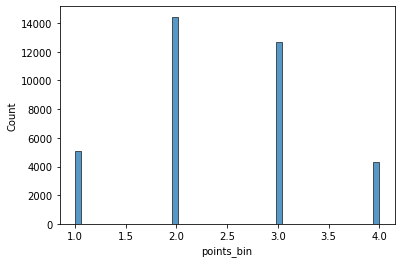

In [22]:
sns.histplot(data['points_bin']);

In [23]:
### perform one-hot encoder
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse = False)
ohe.fit(data[['points_bin']])
class_age_encoded = ohe.transform(data[['points_bin']])

In [24]:
for elements in range(class_age_encoded.shape[1]):      # =====> THIS IS NEED WHATHERVER HOT ENCODER USED  <=====
    data[str(elements)]=class_age_encoded[:,elements]

In [25]:
data.sample(10)

,age,ethnicity,gender,img_name,pixels,points_bin,0,1,2,3
26422,60,3,0,20170117174145046.jpg.chip.jpg,"[171.0, 170.0, 163.0, 155.0, 151.0, 145.0, 130...",4,0.0,0.0,0.0,1.0
32978,27,0,1,20170117180022765.jpg.chip.jpg,"[165.0, 166.0, 167.0, 129.0, 87.0, 59.0, 56.0,...",2,0.0,1.0,0.0,0.0
35950,35,0,0,20170117152434773.jpg.chip.jpg,"[75.0, 76.0, 73.0, 71.0, 69.0, 68.0, 70.0, 48....",3,0.0,0.0,1.0,0.0
31447,26,1,0,20170113155100771.jpg.chip.jpg,"[137.0, 158.0, 177.0, 186.0, 192.0, 192.0, 191...",2,0.0,1.0,0.0,0.0
12848,67,1,0,20170117143355801.jpg.chip.jpg,"[170.0, 170.0, 166.0, 172.0, 178.0, 165.0, 138...",4,0.0,0.0,0.0,1.0
5985,37,1,0,20170117191953052.jpg.chip.jpg,"[159.0, 160.0, 162.0, 163.0, 164.0, 167.0, 168...",3,0.0,0.0,1.0,0.0
23521,49,0,1,20170109220855652.jpg.chip.jpg,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 223.0, 207...",3,0.0,0.0,1.0,0.0
22603,45,0,0,20170117172231908.jpg.chip.jpg,"[23.0, 5.0, 7.0, 10.0, 34.0, 35.0, 38.0, 31.0,...",3,0.0,0.0,1.0,0.0
20337,37,0,0,20170117171523531.jpg.chip.jpg,"[50.0, 49.0, 70.0, 93.0, 120.0, 132.0, 136.0, ...",3,0.0,0.0,1.0,0.0
22325,43,0,0,20170117140802794.jpg.chip.jpg,"[115.0, 114.0, 81.0, 67.0, 49.0, 66.0, 83.0, 9...",3,0.0,0.0,1.0,0.0


## If using piere fiter

In [ ]:
# Pierre distribution
data_clean = data.copy()
data['points_bin'] = pd.qcut(data_clean['age'], q=3)

#view updated DataFrame
print(data)
data['points_bin'].value_counts()

In [ ]:
# perform one-hot encoder to the Pierre distribution
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse = False)
ohe.fit(data[['points_bin']])
class_age_encoded = ohe.transform(data[['points_bin']])

In [ ]:
for elements in range(class_age_encoded.shape[1]):
    data[str(elements)]=class_age_encoded[:,elements]

## categorical fit

In [ ]:
X = data['pixels'].tolist()
X = np.reshape(X, (-1, 48, 48,1))

y=data.drop(columns=['age','ethnicity','gender', 'pixels', 'points_bin', 'img_name'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

In [ ]:
y.shape[-1]

In [ ]:
model_cat = initialize_model_catgorical(X.shape[-1], y.shape[-1])
    
es = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

model_cat.compile(optimizer='adam' ,loss='categorical_crossentropy',metrics=['accuracy'])

history_cat = model_cat.fit(X_train,y_train, validation_split=0.3, epochs=50, callbacks=[es])

In [ ]:
plt.plot(history_cat.history['loss'])
plt.plot(history_cat.history['val_accuracy'])

In [ ]:
models.save_model(model_cat,'Model_cat_15')

In [ ]:
model_cat.evaluate(X_test, y_test)

# calling once the categorical branch model is done

In [ ]:
lower = data['points_bin'].unique()[1]
upper = data['points_bin'].unique()[2]

cacho = data.drop(data[data.points_bin<lower].index | data[data.points_bin>=upper].index).copy()
cacho['age'].unique()

In [ ]:
# looping for all linear model
Histories = []

y = data['age']

for i in range(len(data['points_bin'].unique())):


    # slice the dataframe
    
    #lower = data['points_bin'].unique()[i].left  # ====>>  USING PIERRE FORMAT  <<=========
    #upper = data['points_bin'].unique()[i].right
    #cacho = data.drop(data[data.age<lower].index | data[data.age>=upper].index).copy()
    
    lower = data['points_bin'].unique()[i]   # ====>>  USING JAVIER FORMAT  <<=========
    upper = data['points_bin'].unique()[i+1]
    cacho = data.drop(data[data.points_bin<lower].index | data[data.points_bin>=upper].index).copy()

    
    # prepare the data
    X = cacho['pixels'].tolist()
    X = np.reshape(X, (-1, 48, 48,1))

    y=cacho['age']

    # split data set
    X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.3, random_state=1)
    
    
    print(' ')
    print('*****************************************************************************************')
    print(f'STARTING MODEL =======>>>>>> {i} with age range {y.min()} to {y.max()} and {X.shape} samples')
    print('*****************************************************************************************')
    print(' ')


    # initialize the model
    model = initialize_model_regression()
        
    # compile the model
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
    
    # early stopping
    es = EarlyStopping(monitor='mae', patience=6, restore_best_weights=True)


    # fit
    history = model.fit(X_train, y_train, validation_split=0.3, epochs=40, callbacks=[es])
    
    # save model
    Histories.append(history)
    
    models.save_model(model, f'Model_linear_{y.min()}_{y.max()}')
    
    # delete variables to save RAM
    del model, X, y, X_train, X_test, y_train, y_test, es, history, cacho
    

In [ ]:
y.max()

## Evaluation test categorical

In [ ]:
X = data['pixels'].tolist()
X = np.reshape(X, (-1, 48, 48,1))


In [ ]:
n=107
plt.imshow(X[n], cmap='gray');
#np.where(y.iloc[n]==1)[0]
print(f"real age is {data.iloc[n]}")

In [ ]:
try_inp = np.expand_dims(X[n], axis=0)
model_cat.predict(try_inp).max()
index = np.where(model_cat.predict(try_inp)==(model_cat.predict(try_inp).max()))
print(f'slot number {index[1][0]}, correspond to range {(index[1][0]+1)*step_size-step_size} to {(index[1][0]+1)*step_size}')

In [ ]:
#model_cat.predict(try_inp)

In [ ]:
# try_inp = np.expand_dims(X[n], axis=0)
# model_cat.predict(try_inp).max()
# index = np.where(model_cat.predict(try_inp)==(model_cat.predict(try_inp).max()))
# index[1][0]

## Evaluation test regresional

In [ ]:
! ls

In [ ]:
# load corresponding regresional model
predict_model = models.load_model('Model_linear_1_0')

In [ ]:
# predict regresional
predict_model.predict(try_inp)